In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.shape

(142193, 24)

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()  
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,0


In [13]:
cor=df.corr()
print(cor)

                MinTemp   MaxTemp  Rainfall  ...   Temp3pm   RISK_MM  RainTomorrow
MinTemp        1.000000  0.733919  0.103314  ...  0.699828  0.123928      0.083717
MaxTemp        0.733919  1.000000 -0.074202  ...  0.969735 -0.044154     -0.159087
Rainfall       0.103314 -0.074202  1.000000  ... -0.077553  0.301844      0.236874
Evaporation    0.353698  0.442214 -0.038186  ...  0.429195 -0.031569     -0.089551
Sunshine       0.051907  0.331505 -0.173011  ...  0.349271 -0.222487     -0.327029
WindGustSpeed  0.173331  0.066329  0.127250  ...  0.032274  0.156620      0.225264
WindSpeed9am   0.174946  0.014586  0.085977  ...  0.005026  0.068828      0.090524
WindSpeed3pm   0.174187  0.050381  0.056762  ...  0.028443  0.048554      0.086909
Humidity9am   -0.232372 -0.499777  0.221392  ... -0.492430  0.170541      0.255158
Humidity3pm    0.005913 -0.499725  0.249609  ... -0.555777  0.306711      0.439678
Pressure9am   -0.424357 -0.309093 -0.159676  ... -0.266308 -0.156060     -0.234027
Pres

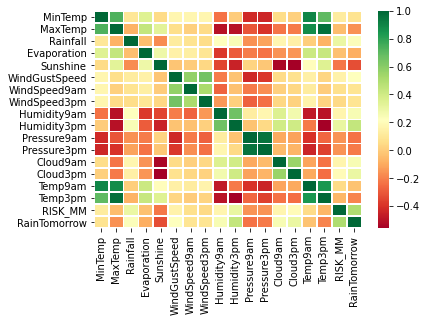

In [14]:
sns.heatmap(cor,fmt="",cmap='RdYlGn',linewidths=0.70)

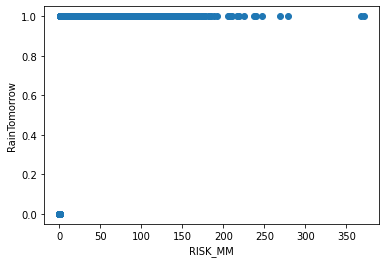

In [15]:
x=df['RISK_MM']
y=df['RainTomorrow']
plt.scatter(x,y)
plt.xlabel('RISK_MM')
plt.ylabel('RainTomorrow')
plt.show()

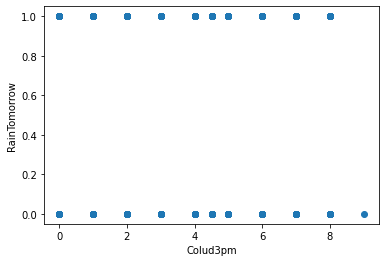

In [16]:
x=df['Cloud3pm']
y=df['RainTomorrow']
plt.scatter(x,y)
plt.xlabel('Colud3pm')
plt.ylabel('RainTomorrow')
plt.show()

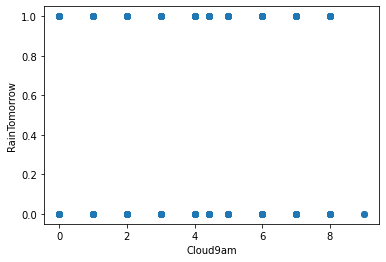

In [17]:
x=df['Cloud9am']
y=df['RainTomorrow']
plt.scatter(x,y)
plt.xlabel('Cloud9am')
plt.ylabel('RainTomorrow')
plt.show()

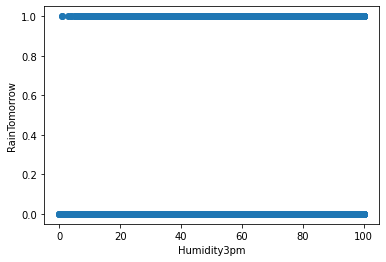

In [18]:
x=df['Humidity3pm']
y=df['RainTomorrow']
plt.scatter(x,y)
plt.xlabel('Humidity3pm')
plt.ylabel('RainTomorrow')
plt.show()

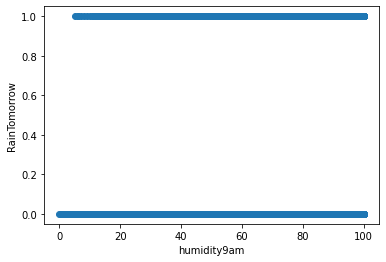

In [19]:
x=df['Humidity9am']
y=df['RainTomorrow']
plt.scatter(x,y)
plt.xlabel('humidity9am')
plt.ylabel('RainTomorrow')
plt.show()

In [20]:
Y=df.RainTomorrow
X=df.drop('RainTomorrow',axis=1)


In [21]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [22]:
X=df.drop(['Date','Location','MinTemp','MaxTemp','Evaporation','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday'],axis=1)

In [23]:
X=X.drop('Sunshine',axis=1)

In [24]:
X=X.drop('RainTomorrow',axis=1)

In [25]:
print(X)

        Rainfall  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RISK_MM
0            0.6         71.0         22.0  8.000000  4.503167      0.0
1            0.0         44.0         25.0  4.437189  4.503167      0.0
2            0.0         38.0         30.0  4.437189  2.000000      0.0
3            0.0         45.0         16.0  4.437189  4.503167      1.0
4            1.0         82.0         33.0  7.000000  8.000000      0.2
...          ...          ...          ...       ...       ...      ...
142188       0.0         59.0         27.0  4.437189  4.503167      0.0
142189       0.0         51.0         24.0  4.437189  4.503167      0.0
142190       0.0         56.0         21.0  4.437189  4.503167      0.0
142191       0.0         53.0         24.0  4.437189  4.503167      0.0
142192       0.0         51.0         24.0  3.000000  2.000000      0.0

[142193 rows x 6 columns]


In [26]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64


In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.head()

,Rainfall,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RISK_MM
126555,0.0,70.0,56.0,4.437189,4.503167,0.0
11175,8.4,82.0,65.0,8.000000,8.000000,11.0
42763,0.0,79.0,68.0,1.000000,1.000000,0.0
72854,1.6,89.0,65.0,8.000000,1.000000,0.0
91417,0.0,65.0,52.0,2.000000,2.000000,0.0


In [28]:
y_train.head()

126555    0
11175     1
42763     0
72854     0
91417     0
Name: RainTomorrow, dtype: int64

In [29]:
x_train.shape

(113754, 6)

In [30]:
x_test.shape

(28439, 6)

In [31]:
y_train.shape

(113754,)

In [32]:
y_test.shape

(28439,)

In [33]:
reg = linear_model.LogisticRegression()

In [34]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = reg.predict(x_test)

In [36]:
results = confusion_matrix(y_test, y_pred)
print(results) 

[[21951     0]
 [    2  6486]]


In [37]:
print('Linear Model Coefficient (m): ', reg.coef_)
print('Linear Model Coefficient (b): ', reg.intercept_)


Linear Model Coefficient (m):  [[ 2.54594483e-03 -8.38501272e-04  2.22929879e-03 -7.99860049e-04
  -1.80247691e-02  2.36044346e+01]]
Linear Model Coefficient (b):  [-26.02599799]


In [38]:
reg.score(x_train,y_train)

0.9999472546020359

In [39]:
reg.score(x_test,y_test)

0.9999296740391715

In [40]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 99.99296740391715


In [41]:
mean_squared_error(y_test,y_pred)

7.032596082843982e-05

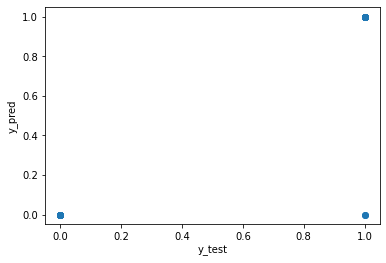

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# ***Decision Tree***

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier()

In [45]:
clf = clf.fit(x_train,y_train)

In [46]:
y_predict = clf.predict(x_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


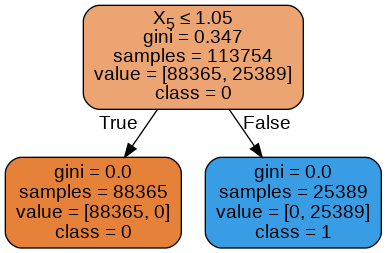

In [48]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rainfall.png')
Image(graph.create_png())

# ***Random Forest***

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_predict1=clf.predict(x_test)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 1.0


In [51]:
clf.predict([[7.8,62.0,38.0,5.000000,7.000000,3.5]])

array([1])

In [52]:
clf.predict([[0,0,0,0,0,0]])

array([0])